In [1]:
import chromadb

client = chromadb.PersistentClient(path="app/chroma_db")
collection = client.get_collection(name="pib_titles")

# Get all documents with embeddings
results = collection.get(include=["documents", "embeddings", "metadatas"])
documents = results["documents"]
embeddings = results["embeddings"]
metadatas = results["metadatas"]


In [4]:
import numpy as np

# Suppose 'embeddings' is your list or array of vectors
# Convert to numpy array if not already
embeddings = np.array(embeddings)

# Print the shape (dimensions) before PCA
print('Shape of embeddings before PCA:', embeddings.shape)


Shape of embeddings before PCA: (40, 384)


In [3]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(np.array(embeddings))


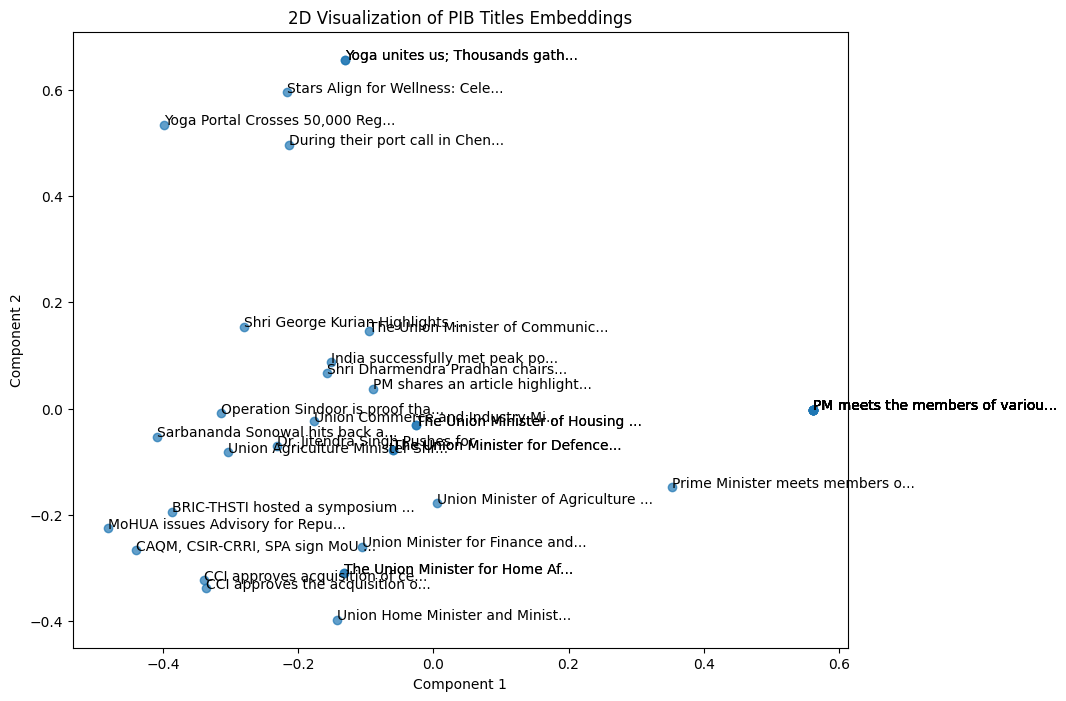

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], alpha=0.7)

# Optionally annotate points with metadata or document snippets
for i, doc in enumerate(documents):
    plt.annotate(doc[:30] + "...", (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))

plt.title("2D Visualization of PIB Titles Embeddings")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


In [2]:
from sklearn.decomposition import PCA
import numpy as np

embeddings = np.array(embeddings)
pca = PCA(n_components=3)
reduced_embeddings = pca.fit_transform(embeddings)


In [3]:
import plotly.graph_objects as go

x = reduced_embeddings[:, 0]
y = reduced_embeddings[:, 1]
z = reduced_embeddings[:, 2]

# Optionally, use document titles or snippets as labels
labels = [doc[:50] for doc in documents]  # Truncate for readability

fig = go.Figure(data=[
    go.Scatter3d(
        x=x,
        y=y,
        z=z,
        mode='markers',
        marker=dict(
            size=5,
            color=z,  # Color by z-axis value
            colorscale='Viridis',
            opacity=0.8
        ),
        text=labels,
        hoverinfo='text'
    )
])

fig.update_layout(
    title='3D Visualization of PIB Titles Embeddings',
    scene=dict(
        xaxis_title='Component 1',
        yaxis_title='Component 2',
        zaxis_title='Component 3'
    )
)

fig.show()
